In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

import wfdb
import glob
import os

# Context
Cardiovascular Disease is the main cause of humain death, responsible for 31% of the world cide deaths in 2016. The major cause of the cardiac deaths is cardiac arrhythmia. The best equipment for monitoring and identifying arrhythmia is an electrocardiogram(ECG).

By recording ECG, analysing these features and classifying signals we can make assessments about the healthy state of the heart, diagnose certain diseases of the heart and predict whether a subject will go on to develop certain diseases.

ECG (Electrocardiogram) is non-stationary physiolocial signal representing electrical activity of heart. In other words, ECG is a periodic waveform that describes the action of heart as it moves.


In this project, we will classify ECG signals to make assessments about the health state of the heart. For this purpose, we use ensemble of three PhysioNet databases: MIT-BIH Arrhythmia Database, MIT-BIH Normal Sinus Rhythm Database, and The BIDMC Congestive Heart Failure Database.

- MIT-BIH Arrhythmia database (ARR-Database) consists of 48 half-hour ECG recording from people with cardiac arrhythmia problem. Each record was sampled at 360 hertz and contains two chanels. source [here](https://www.physionet.org/content/mitdb/1.0.0/ ).

- MIT-BIH Normal Sinus Rhythm Database (NSR-Database) consists of 18 long-tern ECG recording from people with normal sinus rhythms. Records in this databased were sampled at 128 hertz.
source [here](https://www.physionet.org/content/nsrdb/1.0.0/).

- BIDMC Congestive Heart Failure Database (CHF-Database) consists of 15 long-tern ECG recording from people with congestive heart failure. Records in this databased were sampled at 250 hertz. [source](https://www.physionet.org/content/chfdb/1.0.0/)


If you want to waves : https://www.physionet.org/lightwave/?db=mitdb/1.0.0


# List of exercises

# Ex1: Plot signals and show data

There files named "101.dat" and "101.hea" which are an human electrocardiogram (ECG) record of one person with cardiac arrhythmia (ARR) problem.

1.1. Write a function named "load_record_using_wfdb(filename, start, end, channel, directory)" which reads a channel of a record from "start" to "end". Note that each record has two channels. This function returns numpy array which contains data of the signal.  
To get the data it is easier if you stream the data from physionet.  

Specify the parameter "start" = 0.


Specify the parameter "end" = 2000


1.2 By using matplotlib package, plot the signal. The signal is periodic ? Its shape is the same of a sinusoidal wave ?

In [4]:
def load_record_using_wfdb(filename: str, start: int = 0, end: int = 2000, channel=0, directory: str = '.'):
    record = wfdb.rdrecord(filename, sampfrom=start, sampto=end, pn_dir=directory)
    channel_data = np.array(record.p_signal[:, channel])
    return channel_data

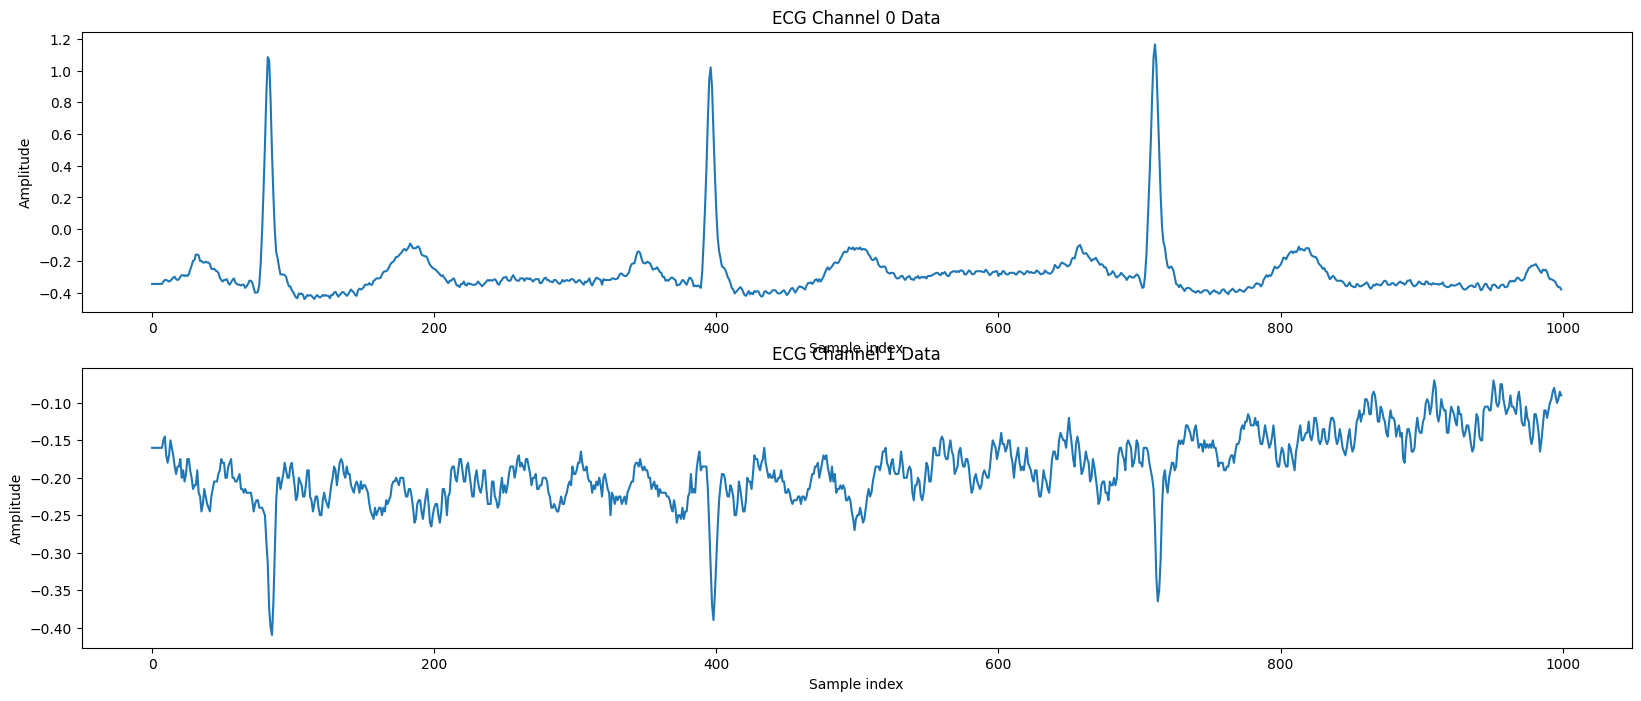

In [5]:
filename = '101'
channel_data_0 = load_record_using_wfdb(filename, start=0, end=1000, channel=0, directory='mitdb')
channel_data_1 = load_record_using_wfdb(filename, start=0, end=1000, channel=1, directory='mitdb')
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

axs[0].plot(channel_data_0)
axs[0].set_title("ECG Channel 0 Data")
axs[0].set_xlabel("Sample index")
axs[0].set_ylabel("Amplitude")

axs[1].plot(channel_data_1)
axs[1].set_title("ECG Channel 1 Data")
axs[1].set_xlabel("Sample index")
axs[1].set_ylabel("Amplitude")
plt.show()

Is the signal periodic?
ECG signals generally appear to be quasi-periodic because they represent cycles of heartbeats. However, they may contain irregularities, especially if the patient has cardiac conditions like arrhythmia.

Does its shape resemble a sinusoidal wave?
No, the shape of an ECG signal does not resemble a simple sinusoidal wave. It has a characteristic shape, usually described by various waves (P, Q, R, S, and T), which represent different phases of the cardiac cycle.

### Test
Use the method "compare_functions"


# Ex2: Cut up signal
2.1.  Write a function named "split_vecto_into_chunk" that splits an array vector into chunks of size N. It takes as arguments a vector and size of chunk and returns a list of its chunks.

2.2.  ECG signals record frequently for a long period of time at different sampling rates.

Write function named "cut_signal_into_segments(signal, sampling_rate, duration_segment)" which allows to cut up a signal into shorter segments of a specified duration. This function returns a list of segments.

Note that:
        number_of_samples = sampling_rate*duration.



[Note] For sampling rate put those indicate before for each record.

[Note] In addition to test your function you can try to print the original signal and the chunks in the same cell or plot

## 2.1.

In [6]:
def split_vector_into_chunk(vector, N):
    chunks = []
    for i in range(0, len(vector), N):
        chunks.append(vector[i:i + N])
    return chunks

### 2.1. Test (check function)

In [7]:
import numpy as np
list_vectors = [np.array([1,2]), np.array([1,2,3,4,5,6,7,8,9,10, 11, 12, 13]), np.random.rand(5)]

for vector in list_vectors:
    result = split_vector_into_chunk(vector, 2)
    print(result)

[array([1, 2])]
[array([1, 2]), array([3, 4]), array([5, 6]), array([7, 8]), array([ 9, 10]), array([11, 12]), array([13])]
[array([0.95144508, 0.41183409]), array([0.44325754, 0.36114413]), array([0.36910037])]


## 2.2.

In [8]:
def cut_signal_into_segments(signal, sampling_rate, duration_segment):
    number_of_samples = int(sampling_rate * duration_segment)
    segments = split_vector_into_chunk(signal, number_of_samples)
    return segments

## 2.2. Test

In [9]:
signals = cut_signal_into_segments(channel_data_0, 360, 2)
num = len(signals)
axs, fig = plt.subplot(num, 1, figsize=(20,5))
for signal in signals:
  axs[0].plot(signal)
  axs[0].set_title(f'segment_{i}')
plt.show()

TypeError: ignored

<Figure size 640x480 with 0 Axes>

# Ex3:  Synchronize data
These records from different database were digitized at different frequences.
We recall that ECG records of ARR-Database were sampled at 360 Hz, those of CHF Database at 250 Hz and those of NSR Database at 128Hz.

3.1. With SCIPY package, write a function named "synchronize_signal" which resamples signal at any sampling rate to a common rate (for example 128 Hz). It takes as arguments a signal and its sampling rate and new sampling rate that we want to resample.

3.2.  Plot the original and resampled signals on the same figure (using subplot of matplotlib).


## 3.1. Solution

In [ ]:
from scipy.signal import resample

def synchronize_signal(signal, original_sampling_rate, new_sampling_rate):
    num_samples = int(len(signal) * (new_sampling_rate / original_sampling_rate))
    resampled_signal = resample(signal, num_samples)
    return resampled_signal


### 3.1. Test

In [ ]:
list_signals = [np.array([0,1,2,3,4,5,6]), np.array([1,2,3]), np.array([1,2,3,4,5,6,7,8,9,10])]
for signal in list_signals:
    signal_resampled = synchronize_signal(signal, 1, 2/3)
    print(signal_resampled)

### 3.2. Test

In [ ]:
def plot_signals(original_signal, resampled_signal):
    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(original_signal)
    plt.title("Original Signal")
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    plt.plot(resampled_signal)
    plt.title("Resampled Signal")
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Create a test signal (for example, a simple sinusoidal signal)
original_signal = channel_data_0  # Sampled at 360 Hz

# Resample the test signal to 128 Hz
resampled_signal = synchronize_signal(original_signal, 360, 128)

# Plot both signals
plot_signals(original_signal, resampled_signal)


# Ex4) Remove noise
ECG signals frequently contain some noise. There are many reasons for this:
- Activity of other body muscles
- Baseline shift because of respirators
- Poor contact of electrode
- Equiment ...

It's important to remove noise from signals. The common frequencies of the important components on the ECG from 0.5Hz - 100Hz.

An array signal named "signal_arr" is loaded in the environement.


4.1.  We note that a low pass filter that allows to passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.


Using scipy.butter, design a low pass filter which filters out frequencies larger than 100Hz. Apply it to signal_arr.



4.2. Similarly, A high pass filter is used to isolate the signals which have frequencies lower than the cutoff frequency.

Design a high pass filter which filters out frequencies smaller than 0.5 Hz. Apply it to signal_arr.



4.3.  A band-pass filter can be formed by cascading a high-pass filter and a low-pass filter.

Design a band-pass filter which filters out frequencies out of range 0.5Hz - 100Hz. Apply it to signal_arr.

4.4.  Plot these signals on the same figure (using the method "matplotlib.pyplot.subplots"). Do you have any comments on the magnitude of these signals ? Did the shape of the origine signal change after passing through one of these filter ?

## Solution

In [ ]:
# @title 4.1 Low pass filter
from scipy.signal import butter, filtfilt

def low_pass_filter(signal, cutoff_freq, sampling_rate):
    b, a = butter(N=4, Wn=cutoff_freq/(0.5*sampling_rate), btype='low')
    return filtfilt(b, a, signal)

low_passed_signal = low_pass_filter(original_signal, 10, 360)  # Assuming 360 Hz sampling rate

In [ ]:
# @title 4.2 High pass filter

def high_pass_filter(signal, cutoff_freq, sampling_rate):
    b, a = butter(N=6, Wn=cutoff_freq/(0.5*sampling_rate), btype='high')
    return filtfilt(b, a, signal)

high_passed_signal = high_pass_filter(original_signal, .00001, 360)

In [ ]:
# @title 4.3 Band pass filter
def band_pass_filter(signal, low_cutoff, high_cutoff, sampling_rate):
    b, a = butter(N=4, Wn=[low_cutoff/(0.5*sampling_rate), high_cutoff/(0.5*sampling_rate)], btype='band')
    return filtfilt(b, a, signal)

band_passed_signal = band_pass_filter(original_signal, 0.5, 10, 360)

In [ ]:
# @title 4.4 Ploting signals

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# Plot original signal
axs[0].plot(original_signal)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Sample index')
axs[0].set_ylabel('Amplitude')

# Plot low-passed signal
axs[1].plot(low_passed_signal)
axs[1].set_title('Low-pass Filtered Signal')
axs[1].set_xlabel('Sample index')
axs[1].set_ylabel('Amplitude')

# Plot high-passed signal
axs[2].plot(high_passed_signal)
axs[2].set_title('High-pass Filtered Signal')
axs[2].set_xlabel('Sample index')
axs[2].set_ylabel('Amplitude')

# Plot band-passed signal
axs[3].plot(band_passed_signal)
axs[3].set_title('Band-pass Filtered Signal')
axs[3].set_xlabel('Sample index')
axs[3].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Ex5)  Discrete Wavelet Transform (DWT)
A way of splitting a signal into several frequency sub-bands is to use Discrete Wavelet transform (DWT). The output of DWT contains two sets of coefficients: the approximation coefficients and detail coefficient.


5.1 Using package pywt in Python, decompose a ECG signal using DWT. Plot the approximation coeffs and detail coeffs on the same figure (using the method subplots of matplotlib )

Do you have comments on the magnitude of approximation coeffs and that of detail coeffs, compare them to that of origine signal ? Did you see the diffence between the origine signal and the approximation coeffs ?

5.2 We can again apply DWT on the approximation coefficients of the previous DWT to get the next level. The method pywt.wavedec() allows us to immediately calculate the coefficients of a higher level.  Using this method, calculate the coeffs of your signal until levels 5. Plot these coeffs on the same figure.


How many are there sets of the coeffs at level 5? Compare these sets of the coeffs to the origine signal. Which one approximates the origine signal ? What is the difference between the 6th coeffs and the detail coeffs ( in exercise 1) ?  Could you deduce how the DWT works ?
When we increase detail levels, what happen between between original signal and its approximation coefficients ?

## Solution

In [ ]:
# @title 5.1 Single Wavelet

import pywt

coeffs = pywt.dwt(original_signal, 'db4')
cA, cD = coeffs  # cA = Approximation coefficients, cD = Detail coefficients


# Plotting
fig, axs = plt.subplots(3, 1, figsize=(15, 12))

axs[0].plot(original_signal)
axs[0].set_title('Original Signal')

axs[1].plot(cA)
axs[1].set_title('Approximation Coefficients')

axs[2].plot(cD)
axs[2].set_title('Detail Coefficients')

plt.tight_layout()
plt.show()


Comments:

Magnitude: The approximation coefficients (cA) typically represent the low-frequency components and are closer to the original signal's magnitude. The detail coefficients (cD) capture high-frequency noise or details and can have smaller magnitudes.

Difference: The approximation coefficients provide a smoothed version of the original signal, capturing its essential characteristics, while the detail coefficients contain higher-frequency information.

In [ ]:
# @title 5.2 Wavelet in cascade

coeffs = pywt.wavedec(original_signal, 'db4', level=5)

# Plot the results
fig, axs = plt.subplots(len(coeffs), 1, figsize=(15, 12))

for i, coef in enumerate(coeffs):
    axs[i].plot(coef)
    if i == 0:
        axs[i].set_title(f'Approximation Coefficients at Level {len(coeffs) - i}')
    else:
        axs[i].set_title(f'Detail Coefficients at Level {len(coeffs) - i}')

plt.tight_layout()
plt.show()


# EX6) Feature engineering for Time series

We will create some features for time series data.

6.1. Write a function named "calculate_statistics(x)" that returns the list of following features:

- 25th percentile value

- median value

- 75th percentile value

- min

- max

- mean

- standard deviation


6.2. Entropy values can be taken as a mesure of complexity of the signal. Write a function named "calculate_entropy(x)" that returns (Shannon) entropy of x


6.3. Zero crossing rate has been widely used in domain of speech recognition.
Create a function named "calculate_crossing(x)" that returns zero crossing rate of x.
Zero crossing rate is the number of times a signal crosses y = 0.


6.4. Write a function named "get_features(signal)" that combines the results of these functions.

6.5. Bonus : What is skewness and kurtosis ? Create a function to calculate both.

## Solution

In [ ]:
def calculate_statistics(x):
    return {
        '25th_percentile': np.percentile(x, 25),
        'median': np.median(x),
        '75th_percentile': np.percentile(x, 75),
        'min': np.min(x),
        'max': np.max(x),
        'mean': np.mean(x),
        'std_dev': np.std(x)
    }

In [ ]:
def calculate_crossing_values(x):
    return ((x[:-1] * x[1:]) < 0).sum()

In [ ]:
from scipy.stats import entropy

def calculate_entropy(x):
    value, counts = np.unique(x, return_counts=True)
    return entropy(counts)

In [ ]:
# @title Bonus

from scipy.stats import skew, kurtosis

def calculate_skewness_kurtosis(x):
    return {
        'skewness': skew(x),
        'kurtosis': kurtosis(x)
    }


In [ ]:
def get_features(signal):
    stats = calculate_statistics(signal)
    ent = calculate_entropy(signal)
    crossing_rate = calculate_crossing_values(signal)
    bonus = calculate_skewness_kurtosis(signal)
    features = {**stats, 'entropy': ent, 'zero_crossing_rate': crossing_rate, **bonus}
    return features

In [ ]:
get_features(original_signal)

### Test

In [ ]:
list_test = [np.array([1,2,3,4,5,6,7,8, 9, 10]), np.array([1]), np.random.rand(5), np.random.normal(0, 1, 1000)]
for vector in list_test:
    stats = calculate_statistics(vector)
    print(stats)


### Test
Generate a normal distribution to check standard deviation, skewness, kurtosis

In [ ]:
#calculate_crossing_values(x)
input_tests = [np.array([1,2,-3,4, 0, 1]), np.random.normal(0, 1, 1000), np.random.uniform(0,1, 100)]
for input_test in input_tests:
    print(calculate_crossing_values(input_test))

# Ex7) Extract features for ECG signals

DWT is used to decompose signal into its frequency bands. Now, you will calculate the features for each set of coeffs. These features will be used as input for a classifier.


Create a funciton named "get_features_for_signal(signal)" that do the following tasks:
1. Calculate the coeffs of your signal until levels 3.
2. Extract features for each of these coeffs

This function returns a list of features which combine all features from each coeff.

## Solution

In [ ]:
def get_features_for_signal(signal):
    coeffs = pywt.wavedec(signal, 'db4', level=3)  # Decompose signal into DWT coefficients up to level 3
    all_features = []

    for i, coeff in enumerate(coeffs):
        coeff_features = get_features(coeff)  # Extract features for each set of coefficients
        coeff_features = {f'coeff_{i}_{key}': value for key, value in coeff_features.items()}  # Rename keys to indicate which coeff they belong to
        all_features.append(coeff_features)

    combined_features = {}
    for feature_set in all_features:
        combined_features.update(feature_set)

    return combined_features

get_features_for_signal(original_signal)

# Ex8) Continuous Wavelet Transform (CWT) - Scaleogram

In this exercise, you will learn about Continuous Wavelet Transform. The CWT is used for spectral analysis of signal. The CWT returns two variables: the coefficients and the frequency. CWT coefficients in form of scalogram can be used to serve as image inputs to a deep network for signal classifications.


A signal from ARR Database is loaded in the environment and store in the variable "signal_arr".

1. Using pywt library, calculate the coefficients of the signal "signal_arr".

Do you have any comments on the coefficients ? What is the shape of the coefficients ?
Does it depend on the size of the variable "scales" that you choose?

The coeffs are complex or real ? Which wavelet function did you choose ?

2. Using plt.imshow(), display together the origine signal and the magnitude of the coefficients.


## Solution

In [ ]:
# Define the scales and the wavelet
scales = np.arange(1, 128)
wavelet = 'cmor'

# Compute the CWT
coefficients, frequencies = pywt.cwt(original_signal, scales, wavelet)

# Analyze the shape and nature of coefficients
print("Shape of coefficients:", coefficients.shape)
print("Coefficients are complex:", np.iscomplexobj(coefficients))



The shape of the coefficients depends on both the length of your original signal and the range of scales you choose. The larger the range of scales, the more rows you'll have in your coefficient matrix.

The coefficients can be either real or complex depending on the wavelet function you choose. For example, if you use the 'cmor' (Complex Morlet) wavelet, the coefficients will be complex.


In [ ]:
# Plot original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("Original Signal")
plt.plot(original_signal)

# Plot the CWT coefficients
plt.subplot(2, 1, 2)
plt.title("CWT Coefficients")
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(original_signal), 1, 128], cmap='jet', interpolation='bilinear')
plt.colorbar(label="Magnitude")

plt.tight_layout()
plt.show()


# Ex9) Train a classifier

The file 'ecg.csv' existed already in the environment. It was built of 81 records from the three PhysioNet databases. The data were truncated ( thanks to the function "cut_signal_into_segments"), resampled ( thanks to the fun "synchronize_signal") and passed into the function "get_features_of_signal" to get the features.

The goal of this exercise is to create a model to classify the signals.

1. Using panda, load the file 'ecg.csv' and store it in variable "df"

2. Label is located in which column? Store it in variable "y".

3. Normalise "df" avec un MinMaxScaler

4. Split "df" into df_train and df_test

5. Import a classifier then trainning the model.

6. Calculate the accuracy for df_test

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ecg.csv')

In [ ]:
df['1']

In [10]:
df_train = df.iloc[[0,2,4]]
df_test = df.iloc[[1,3,5]]

NameError: ignored

In [11]:
y_train = df_train['1']
y_test = df_test['1']


NameError: ignored

In [12]:
df_train = df_train.drop(['0', '1'], axis=1)
df_test = df_test.drop(['0', '1'], axis=1)

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(df_train)
x_test = scaler.fit_transform(df_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


# Ex10) Train a CNN model
There are some options to classify signals.
One is to use DWT and the features to classify ECG signals.  We have done it.
Another approach is to use CWT and CNN. To do so, you need:

1) Apply the CWT on the dataset

2) Transform the data to the right format

3) Create a CNN model (with Keras, Pytorch ....)

4) Train the model

5) Test the accuracy

And go!!!

In [ ]:
ary_name = 'mitdb' # arythmetia
normal_name = 'nsrdb'
congestive_name = 'chfdb'

In [ ]:
ary = [wfdb.rdrecord(record_name, pn_dir=ary_name) for record_name in wfdb.get_record_list(ary_name)]
normal = [wfdb.rdrecord(record_name, pn_dir=normal_name) for record_name in wfdb.get_record_list(normal_name)]
congestive_name = [wfdb.rdrecord(record_name, pn_dir=congestive_name) for record_name in wfdb.get_record_list(congestive_name)]



In [ ]:
print(f"ary: {len(ary)}\n normal: {len(normal)}\n congestive: {len(congestive_name)}")

ary: 48
 normal: 18
 congestive: 15


In [ ]:
ary_tronc = [(rec.p_signal, rec.fs, rec.sig_len) for rec in ary]
normal_tronc = [(rec.p_signal, rec.fs, rec.sig_len) for rec in normal]
congestive_tronc = [(rec.p_signal, rec.fs, rec.sig_len) for rec in congestive_name]

In [ ]:
df_ary = pd.DataFrame(ary_tronc, columns=['signal', 'fs', 'len'])
df_normal = pd.DataFrame(normal_tronc, columns=['signal', 'fs', 'len'])
df_congestive = pd.DataFrame(congestive_tronc, columns=['signal', 'fs', 'len'])

df_ary['label'] = 1
df_normal['label'] = 0
df_congestive['label'] = 2

df = pd.concat([df_ary, df_normal, df_congestive], axis=0)
df.label.value_counts()

1    48
0    18
2    15
Name: label, dtype: int64

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.to_pickle('/content/df.pickle')

NameError: ignored

In [2]:
df = pd.read_pickle('/content/drive/MyDrive/mlbio/df.pkl')

In [ ]:
def apply_cwt(signal):
    # Define wavelet parameters
    wavelet = 'morl'  # You can choose a suitable wavelet
    scales = np.arange(1, 128)  # Adjust scales as needed

    # Apply CWT
    cwt = pywt.cwt(signal, scales, wavelet)
    return cwt

def apply_cwt_to_channels(signals):
    cwt_results = []
    for channel_data in signals.T:  # Transpose to iterate over channels
        cwt_channel = apply_cwt(channel_data)
        cwt_results.append(cwt_channel)
    return np.array(cwt_results)

360